<a href="https://colab.research.google.com/github/patelkanak23/Twitter_sentiment_analysis/blob/main/twitter_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Given Twitter US Airline Sentiment Dataset, which contains data for over 14000 tweets, your task is to predict the sentiment of the tweet i.e. positive, negative or neutral.

## *Importing the required libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

## *Importing training and testing data*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_twitter_x_y_train.csv to training_twitter_x_y_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_twitter_x_test.csv to test_twitter_x_test.csv


In [ ]:
x_train=pd.read_csv('training_twitter_x_y_train.csv')
x_test=pd.read_csv('test_twitter_x_test.csv')

In [ ]:
x_train.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [ ]:
x_test.head()

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [ ]:
positive=x_train['airline_sentiment'].value_counts()['positive']
negative=x_train['airline_sentiment'].value_counts()['negative']
neutral=x_train['airline_sentiment'].value_counts()['neutral']

## *Displaying data for analysis*

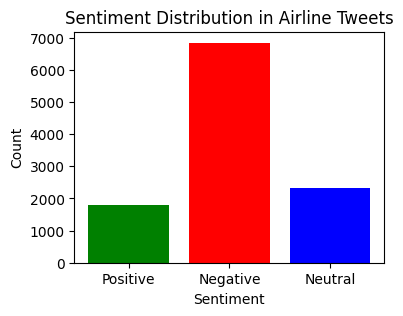

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive, negative, neutral]

# Create a bar chart
plt.figure(figsize=(4 ,3))
plt.bar(labels, counts, color=['green', 'red', 'blue'])

# Add titles and labels
plt.title('Sentiment Distribution in Airline Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

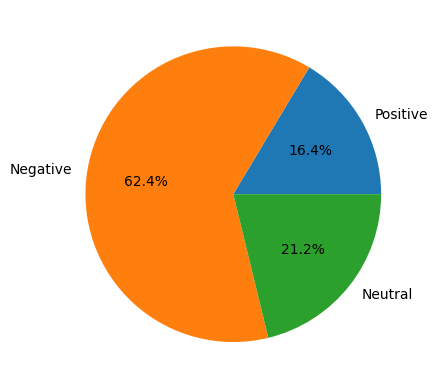

In [ ]:
sentiment=[positive,negative,neutral]
labels=['Positive','Negative','Neutral']
plt.pie(sentiment,labels=labels,autopct='%1.1f%%')
plt.show()

## *Formatting training data*

In [ ]:
x_train1=x_train[['text', 'airline_sentiment']]


In [ ]:
training_data = x_train1.values

In [ ]:
tweets = []
for i in range(len(training_data)):
    tweets.append((word_tokenize(training_data[i][0]), training_data[i][1]))

In [ ]:
tweets[0:5]

[(['@',
   'SouthwestAir',
   'I',
   'am',
   'scheduled',
   'for',
   'the',
   'morning',
   ',',
   '2',
   'days',
   'after',
   'the',
   'fact',
   ',',
   'yes',
   '..',
   'not',
   'sure',
   'why',
   'my',
   'evening',
   'flight',
   'was',
   'the',
   'only',
   'one',
   'Cancelled',
   'Flightled'],
  'negative'),
 (['@',
   'SouthwestAir',
   'seeing',
   'your',
   'workers',
   'time',
   'in',
   'and',
   'time',
   'out',
   'going',
   'above',
   'and',
   'beyond',
   'is',
   'why',
   'I',
   'love',
   'flying',
   'with',
   'you',
   'guys',
   '.',
   'Thank',
   'you',
   '!'],
  'positive'),
 (['@',
   'united',
   'Flew',
   'ORD',
   'to',
   'Miami',
   'and',
   'back',
   'and',
   'had',
   'great',
   'crew',
   ',',
   'service',
   'on',
   'both',
   'legs',
   '.',
   'THANKS'],
  'positive'),
 (['@',
   'SouthwestAir',
   '@',
   'dultch97',
   'that',
   "'s",
   'horse',
   'radish',
   '😤🐴'],
  'negative'),
 (['@',
   'united',
   's

## *Data Cleaning*

In [ ]:
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)

In [ ]:
def get_simple_pos(tag):
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
def clean_review(words):
  output_words=[]
  for w in words:
    if w.lower() not in stops:
      pos=pos_tag([w])
      clean_word=lemmatizer.lemmatize(w,pos=get_simple_pos(pos[0][1]))
      output_words.append(clean_word.lower())
  return output_words

In [ ]:
twitty=[(clean_review(tx),sentiment) for tx,sentiment in tweets]

In [ ]:
twitty[0]

(['southwestair',
  'schedule',
  'morning',
  '2',
  'day',
  'fact',
  'yes',
  '..',
  'sure',
  'even',
  'flight',
  'one',
  'cancelled',
  'flightled'],
 'negative')

In [ ]:
all_words=[]
for t in twitty:
  all_words+=t[0]

In [ ]:
all_words = [word for word in all_words if len(word) > 1]


## *Formatting testing data*

In [ ]:
x_test1=x_test[['text']]

In [ ]:
testing_data = x_test1.values

In [ ]:
testing_data[0:5]

array([["@AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?"],
       ['@AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.'],
       ["@SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow."],
       ['@USAirways I can legitimately say that I would have rather driven cross country than flown on US Airways.'],
       ['@AmericanAir still no response from AA. great job guys!']],
      dtype=object)

In [ ]:
tweets_test = []
for i in range(len(testing_data)):
    tweets_test.append((word_tokenize(testing_data[i][0])))

In [ ]:
tweets_test[0:5]

[['@',
  'AmericanAir',
  'In',
  'car',
  'gng',
  'to',
  'DFW',
  '.',
  'Pulled',
  'over',
  '1hr',
  'ago',
  '-',
  'very',
  'icy',
  'roads',
  '.',
  'On-hold',
  'with',
  'AA',
  'since',
  '1hr',
  '.',
  'Ca',
  "n't",
  'reach',
  'arpt',
  'for',
  'AA2450',
  '.',
  'Wat',
  '2',
  'do',
  '?'],
 ['@',
  'AmericanAir',
  'after',
  'all',
  ',',
  'the',
  'plane',
  'didn',
  '’',
  't',
  'land',
  'in',
  'identical',
  'or',
  'worse',
  ')',
  'conditions',
  'at',
  'GRK',
  'according',
  'to',
  'METARs',
  '.'],
 ['@',
  'SouthwestAir',
  'ca',
  "n't",
  'believe',
  'how',
  'many',
  'paying',
  'customers',
  'you',
  'left',
  'high',
  'and',
  'dry',
  'with',
  'no',
  'reason',
  'for',
  'flight',
  'Cancelled',
  'Flightlations',
  'Monday',
  'out',
  'of',
  'BDL',
  '!',
  'Wow',
  '.'],
 ['@',
  'USAirways',
  'I',
  'can',
  'legitimately',
  'say',
  'that',
  'I',
  'would',
  'have',
  'rather',
  'driven',
  'cross',
  'country',
  'than',


## *Using Inbuilt Naive Bayes Classifier in NLTK*

In [ ]:
freq=nltk.FreqDist(all_words)
common=freq.most_common(3000)
features=[i[0] for i in common]

In [ ]:
features

['flight',
 'united',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 "n't",
 "'s",
 'http',
 'hour',
 'thanks',
 'cancelled',
 'service',
 'help',
 'customer',
 'time',
 '...',
 'call',
 'bag',
 'plane',
 'wait',
 'go',
 'amp',
 'need',
 'hold',
 'fly',
 "'m",
 'make',
 'thank',
 'would',
 'still',
 'one',
 'gate',
 'day',
 'please',
 'back',
 'ca',
 'delayed',
 'try',
 'airline',
 'take',
 'virginamerica',
 'flightled',
 'say',
 'seat',
 "'ve",
 'delay',
 "''",
 '``',
 'like',
 'change',
 'phone',
 'bad',
 'agent',
 'late',
 'today',
 'know',
 'guy',
 'ticket',
 'miss',
 'work',
 'airport',
 'book',
 'could',
 'minute',
 'way',
 'give',
 'great',
 'check',
 'well',
 'never',
 'even',
 'lose',
 'min',
 'see',
 'really',
 'want',
 'home',
 'travel',
 'hr',
 "'re",
 'tomorrow',
 'weather',
 'last',
 'dm',
 'good',
 'another',
 'people',
 'use',
 'love',
 'issue',
 'email',
 'new',
 'first',
 'told',
 'let',
 'sit',
 "'ll",
 'yes',
 'look',
 'much',
 'luggage',
 'ever

In [ ]:
def get_feature_dict(words):
  current_features={}
  words_set=set(words)
  for w in features:
    current_features[w]=w in words_set
  return current_features

In [ ]:
training_data=[(get_feature_dict(tw),sentiment) for tw,sentiment in twitty]


In [ ]:
training_data[0:5]

[({'flight': True,
   'united': False,
   'usairways': False,
   'americanair': False,
   'southwestair': True,
   'jetblue': False,
   'get': False,
   "n't": False,
   "'s": False,
   'http': False,
   'hour': False,
   'thanks': False,
   'cancelled': True,
   'service': False,
   'help': False,
   'customer': False,
   'time': False,
   '...': False,
   'call': False,
   'bag': False,
   'plane': False,
   'wait': False,
   'go': False,
   'amp': False,
   'need': False,
   'hold': False,
   'fly': False,
   "'m": False,
   'make': False,
   'thank': False,
   'would': False,
   'still': False,
   'one': True,
   'gate': False,
   'day': True,
   'please': False,
   'back': False,
   'ca': False,
   'delayed': False,
   'try': False,
   'airline': False,
   'take': False,
   'virginamerica': False,
   'flightled': True,
   'say': False,
   'seat': False,
   "'ve": False,
   'delay': False,
   "''": False,
   '``': False,
   'like': False,
   'change': False,
   'phone': False,
   '

In [ ]:
classifier=NaiveBayesClassifier.train(training_data)

In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
                   kudos = True           positi : negati =     51.9 : 1.0
               fantastic = True           positi : negati =     34.2 : 1.0
                favorite = True           positi : negati =     34.2 : 1.0
             outstanding = True           positi : negati =     29.1 : 1.0
                 helpful = True           positi : neutra =     26.3 : 1.0
                   flyfi = True           positi : negati =     24.1 : 1.0
                   thank = True           positi : negati =     22.6 : 1.0
                 awesome = True           positi : negati =     22.6 : 1.0
                    hold = True           negati : positi =     22.3 : 1.0
               beautiful = True           positi : negati =     21.5 : 1.0


In [ ]:
y_pred=[]
for tw in tweets_test:
  y_pred.append(classifier.classify(get_feature_dict(tw)))

In [ ]:
y_pred[0:5]

['negative', 'neutral', 'negative', 'negative', 'positive']

In [ ]:
posi=y_pred.count('positive')
neg=y_pred.count('negative')
neu=y_pred.count('neutral')

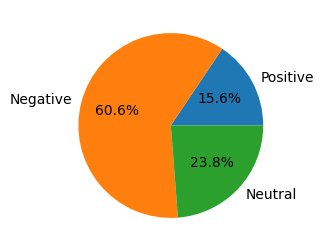

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [posi, neg, neu]
plt.figure(figsize=(4 ,3))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

## *Using SVM for Classification*

In [ ]:
count_vec=CountVectorizer(max_features=2000)

In [ ]:
y_train = []
tweets1 = []
for tweet, sentiment in tweets:
    tweets1.append(" ".join(tweet))
    y_train.append(sentiment)

In [ ]:
tweets_test1 = []
for t in tweets_test:
    tweets_test1.append(" ".join(t))

In [ ]:
x_train_features = count_vec.fit_transform(tweets1)

In [ ]:
x_test_features = count_vec.transform(tweets_test1)

In [ ]:
svc = SVC()
svc.fit(x_train_features, y_train)

SVC()

In [ ]:
y_pred_svm = svc.predict(x_test_features)

In [ ]:
df = pd.DataFrame(y_pred_svm)

In [ ]:
df.head()

,0
0,negative
1,negative
2,negative
3,negative
4,positive


In [ ]:
pos=df[0].value_counts()['positive']
neg=df[0].value_counts()['negative']
neu=df[0].value_counts()['neutral']

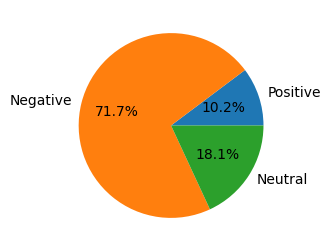

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [pos, neg, neu]
plt.figure(figsize=(4 ,3))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

## *Using Random Forest For Classification*

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_features, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(x_test_features)
df1 = pd.DataFrame(y_pred_rf)

In [ ]:
df1.head()

,0
0,negative
1,negative
2,negative
3,negative
4,negative


In [ ]:
pos=df1[0].value_counts()['positive']
neg=df1[0].value_counts()['negative']
neu=df1[0].value_counts()['neutral']

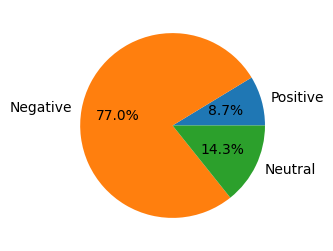

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [pos, neg, neu]
plt.figure(figsize=(4 ,3))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

## *Using Multinomial Naive Bayes For Classificaction*

In [ ]:
mnv = MultinomialNB(alpha = 1)
mnv.fit(x_train_features, y_train)


MultinomialNB(alpha=1)

In [ ]:
y_pred_mnv = mnv.predict(x_test_features)
df2 = pd.DataFrame(y_pred_mnv)

In [ ]:
df2.head()

,0
0,negative
1,negative
2,negative
3,negative
4,positive


In [ ]:
pos=df2[0].value_counts()['positive']
neg=df2[0].value_counts()['negative']
neu=df2[0].value_counts()['neutral']

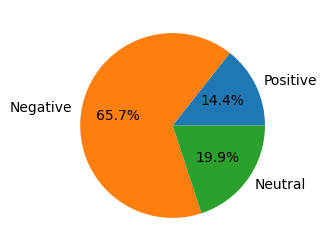

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [pos, neg, neu]
plt.figure(figsize=(4 ,3))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()